<a href="https://colab.research.google.com/github/cyber-prags/ML-and-BioOptimization/blob/main/N_arm_bandit5_modif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-arm bandit problem

1.   Pragyan Jyoti Dutta (201771610)
2.   Daniela Dzah(201775930)
3.   Victor Gonzalez Alvarez(20177)
4.   Patalo selobakin(201776164)
5.   Yonghee Kim(201778592)
6.   LiChi Liu (201725665)


## Importing the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Setting the initial parameters

In [ ]:
# Set the seed for reproducibility
np.random.seed(0)

# Parameters
n_bandit = 2000  # number of bandit problems
k_values = [5, 10, 20]  # different numbers of arms in each bandit problem
epsilon_options = [0, 0.01, 0.1, 0.5, 1]  # epsilon values to test
max_steps = 2000  # maximum number of steps for each epsilon value



In the above **epsilon_values** sets the epsilon values; each determining the probability of choosing exploration over exploitation. Values close to _1_ being more inclined towards more exploration while values close to _0_ being close to preferring more exploitation over exploration.

## Greedy Epsilon Function

In [ ]:
"""
Function to run the epsilon-greedy bandit algorithm until convergence
with input parameter:
  k = amount of arms
  epsilon = This variable represents andomnes level, a higher value epsilon focuses more on exploration compared to exploitation
  n_bandit = This variable indicates how many bandit problems will be simulated, in this case of assignment it 2000
  true_action_values  = This variable represents the true mean reward values for each arm of each bandit problem
  true_opt_arms = This variable stores the index of the true optimal arms (actions with the highest mean rewards) for each bandit problem.

How it works :
1) In initialization :
 The true reward values for each action in each bandit problem are generated randomly from a normal distribution with mean 0 and standard deviation 1.
2) For each step,
For each bandit problem, an action is chosen either randomly with probability epsilon or greedily (selecting the action with the highest estimated reward value) with probability 1 - epsilon.
The estimated reward value for the chosen action is updated using the sample reward obtained and the action count

The function returns :
- the average rewards obtained over the iterations (rewards)
- the percentage of times the optimal action was selected (optimal_action_count)
- and the estimated action values estimated_action_values

"""

def run_epsilon_greedy_bandit(n_bandit, k, epsilon):
    true_action_values = np.random.normal(0, 1, (n_bandit, k))  # true means q*(a) for each arm for all bandits
    true_opt_arms = np.argmax(true_action_values, axis=1)  # true optimal arms in each bandit

    # Initialize variables
    estimated_action_values = np.zeros((n_bandit, k))  # estimated rewards for each action
    action_counts = np.ones((n_bandit, k))       # number of times each action was selected
    rewards = []                 # stores the average rewards obtained in each iteration of the bandit algorithm.
    optimal_action_percentage = []    # stores the percentage of times the optimal action (the action with the highest mean reward) is selected in each iteration

    # Run the bandit algorithm by iteration until the maximum steps have been reached
    for steps in range(1, max_steps + 1):
        rewards_in_step = []              # stores all rewards in the current pull/time-step
        optimal_action_pulls = 0         # counts the number of times the best arm (optimal action) is pulled in the current time step.
        for bandit_problem in range(n_bandit):           # iterates over each bandit problem.
            """
            An chosen action can be random with probability epsilon from k arms
            or
            based on greedily strategy (selecting the action with the highest estimated reward value) with probability 1-epsilon
            - selected_action = the variable represents the index of the action that the algorithm has chosen in a current bandit problem

            """
            if np.random.random() < epsilon:
                selected_action = np.random.randint(k)
            else:
                selected_action = np.argmax(estimated_action_values[bandit_problem])

            if selected_action == true_opt_arms[bandit_problem]:  # To calculate % optimal action
                optimal_action_pulls += 1

            reward_obtained = np.random.normal(true_action_values[bandit_problem][selected_action], 1)  # The reward obtained by pulling the chosen action is sampled from a normal distribution
            rewards_in_step.append(reward_obtained)      # accumulate reward obtain in current bandit problem
            action_counts[bandit_problem][selected_action] += 1   # increment the count of the selected action for the current bandit problem by 1
            estimated_action_values[bandit_problem][selected_action] += (reward_obtained - estimated_action_values[bandit_problem][selected_action]) / action_counts[bandit_problem][selected_action]
            #  computes the new estimated value by adding a fraction of the difference between the obtained reward and the current estimate to the current estimate
        avg_reward_in_step = np.mean(rewards_in_step)   # average reward obtained in the current step (iteration) by taking the mean of all rewards collected during this step
        rewards.append(avg_reward_in_step)              # append this value to the
        optimal_action_percentage.append(float(optimal_action_pulls) * 100 / n_bandit)

    return rewards, optimal_action_percentage, estimated_action_values

### Plotting our graphs

Running simulations for k = 5
Current epsilon: 0
Estimated action values (Q) for the arms:
Arm 1: -0.035735714760879944
Arm 2: -0.0005921256451748179
Arm 3: -0.001702833605863245
Arm 4: -0.01351760909348009
Arm 5: -0.01293769667458372
 
Average rewards: [-0.07156634411141206, 0.28087754111716356, 0.4575630144537401, 0.5405041077754915, 0.6093340694555488, 0.6729621347914242, 0.7376911793651241, 0.7701424532433793, 0.7970212932007716, 0.7930986658500087, 0.7834919780612275, 0.8553055902131995, 0.8385605815162964, 0.7879203924021321, 0.8076162892702229, 0.8486767854771257, 0.8479004041434912, 0.8640427364339787, 0.8716035565284119, 0.8536670781378326, 0.8447816879891635, 0.8916735205923481, 0.8345325314092527, 0.8924755524772233, 0.8726235244952575, 0.8754477168698611, 0.9001469257053692, 0.8702453152196072, 0.8365465230395055, 0.9162508622162948, 0.876265083345601, 0.8612591448349298, 0.8944704058340579, 0.9031879862615972, 0.8815742060303581, 0.8883322645938077, 0.8988482513167614, 0.8

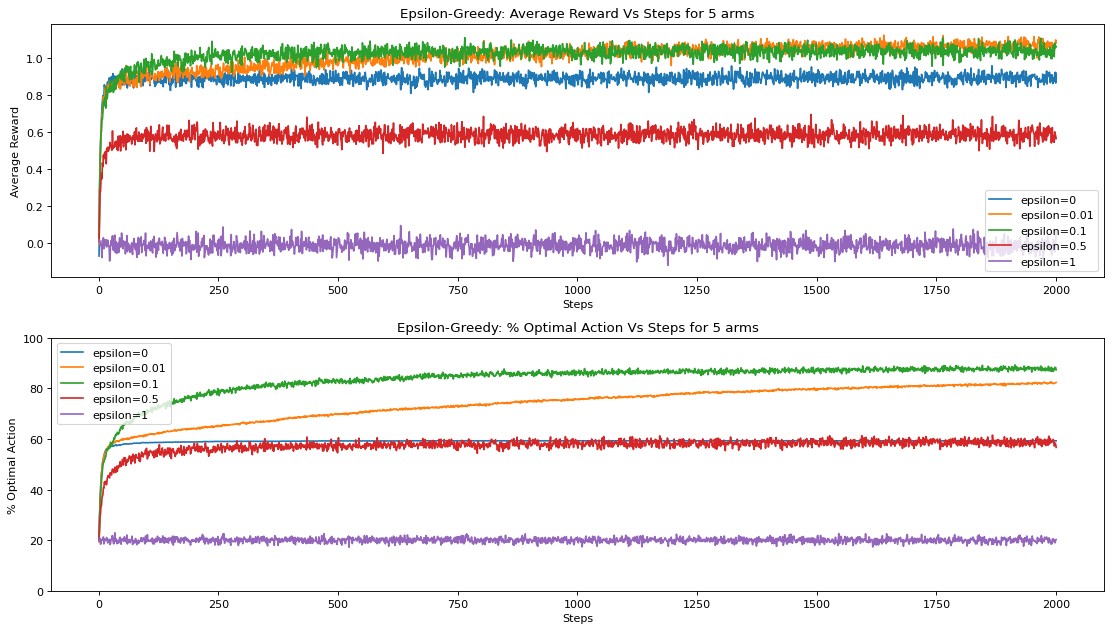

Running simulations for k = 10
Current epsilon: 0
Estimated action values (Q) for the arms:
Arm 1: -0.024093457320748638
Arm 2: -0.004106879170543323
Arm 3: -0.0067848435417893
Arm 4: -0.013269841182803837
Arm 5: -0.01358910891088469
Arm 6: -0.0017615229800762827
Arm 7: 0.007429730097888598
Arm 8: -0.0004425243208961156
Arm 9: -0.0015806546041558286
Arm 10: 0.004331346391553344
 
Average rewards: [-0.0170396352289594, 0.2729471308365107, 0.39539224329554623, 0.49308842193606717, 0.6549398569057425, 0.7316262911406987, 0.6862741178356414, 0.7528060732752241, 0.7719723636294421, 0.8074928065536066, 0.8150176850482619, 0.8363924916755393, 0.8725195232829654, 0.8610096613126969, 0.8843259621193351, 0.9022021570306042, 0.8502685856375074, 0.9363440251915678, 0.9025217021067531, 0.9429045309452524, 0.901760953295479, 0.9143944109759522, 0.9373106998734794, 0.9441156075588705, 0.9370639493367457, 0.952335747240865, 0.9783358262198767, 0.9823064562950902, 0.9330462103067357, 0.9099194124592352

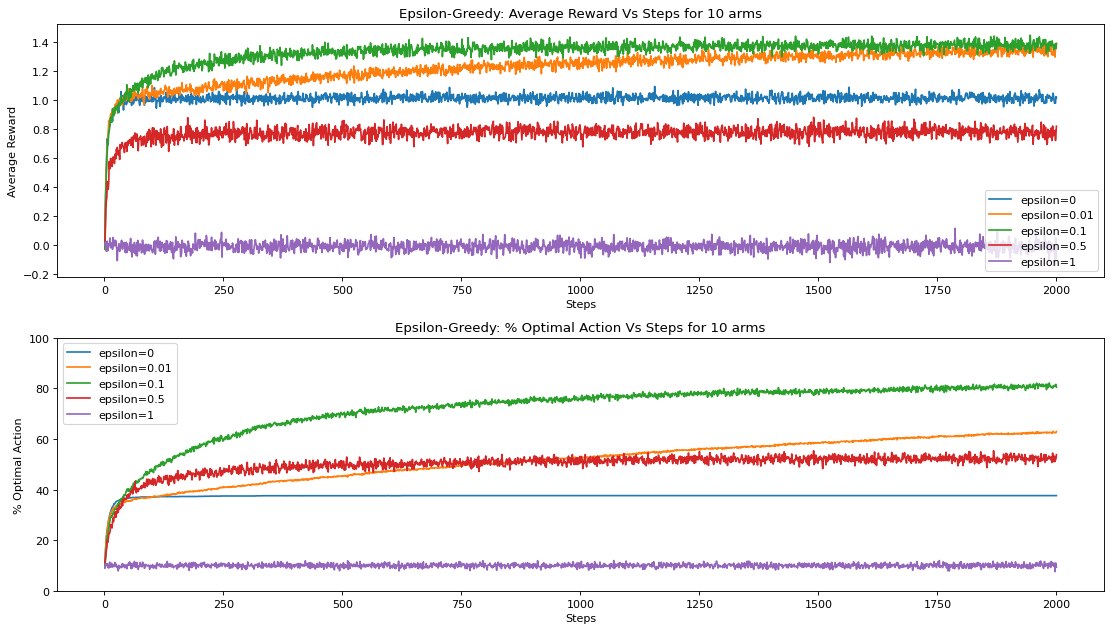

Running simulations for k = 20
Current epsilon: 0
Estimated action values (Q) for the arms:
Arm 1: -0.022412432637415814
Arm 2: 0.012961243169122722
Arm 3: 0.011142640921992875
Arm 4: 0.0028679333769072867
Arm 5: -0.005731730670958233
Arm 6: 0.008508510398855206
Arm 7: -0.002346555828727188
Arm 8: 0.0034352992838298465
Arm 9: 0.004297756571955038
Arm 10: -0.0068524773506111
Arm 11: -0.002646927725988383
Arm 12: 0.0038665306012247644
Arm 13: 0.00022858150350360163
Arm 14: 0.000917531770913623
Arm 15: 0.00031536025877630707
Arm 16: -0.001934755318078102
Arm 17: 0.0019236873329498904
Arm 18: 0.0003821843189620073
Arm 19: -0.00037353829117091873
Arm 20: -0.0006027141965872486
 
Average rewards: [-0.030858713197255673, 0.26387773848707025, 0.43500825234731255, 0.5763520476657793, 0.6240403912535567, 0.7316348522257169, 0.7845985990390334, 0.831069588517548, 0.8441797725906282, 0.8625681983856388, 0.8838106018462071, 0.9248396506023825, 0.9489518145533217, 0.9365516373216811, 0.9599357067609

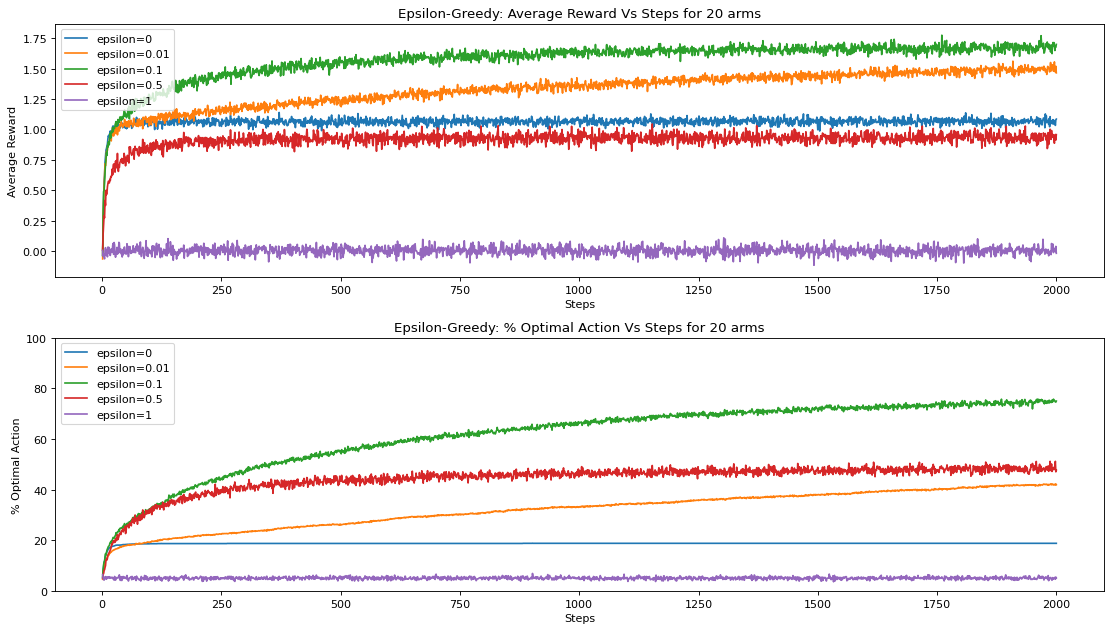

In [ ]:
# Loop over different k values
for k in k_values:
    print(f'Running simulations for k = {k}')
    fig, axes = plt.subplots(2,1 , figsize=(14, 8), dpi=80)

    # Loop over different epsilon values
    for epsilon in epsilon_options:
        print('Current epsilon:', epsilon)

        # Run the bandit algorithm
        avg_rewards, opt_action_percentages, estimated_action_values = run_epsilon_greedy_bandit(n_bandit, k, epsilon)
        # Print the estimated action values
        print('Estimated action values (Q) for the arms:')
        for arm_index in range(k):
            print(f'Arm {arm_index + 1}:', estimated_action_values[:, arm_index].mean())  # Print the average Q-value for each arm across all bandits
        print(' ')
        print('Average rewards:', avg_rewards)
        print(' ')
        print('Percentage of optimal action:',opt_action_percentages)
        print(' ')
        print("Total average reward :", sum(avg_rewards))
        print(' ')
        print(f'Optimal percentage of optimal action for epsilon= {epsilon} and arm= {k}:', max(opt_action_percentages))
        print('----------------------------------------------------------------------------------')
        print(' ')
        print(' ')

        # Plotting
        axes[0].plot(range(1, len(avg_rewards) + 1), avg_rewards, label=f'epsilon={epsilon}')
        axes[1].plot(range(1, len(opt_action_percentages) + 1), opt_action_percentages, label=f'epsilon={epsilon}')

    # Set labels and titles
    axes[0].set_title(f'Epsilon-Greedy: Average Reward Vs Steps for {k} arms')
    axes[0].set_ylabel('Average Reward')
    axes[0].set_xlabel('Steps')
    axes[0].legend()

    axes[1].set_title(f'Epsilon-Greedy: % Optimal Action Vs Steps for {k} arms')
    axes[1].set_ylabel('% Optimal Action')
    axes[1].set_xlabel('Steps')
    axes[1].set_ylim(0, 100)
    axes[1].legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


# **Conclution/Findings**
(more detailed in a separated report document)



In several times of attempts the result indicates that:

*   Epsilon=0.1 and epsilon=0.01 will provide the highest average rewards after 2000 steps.
*   Epsilon=0 (when the algorithm will always choose the arm with the highest reward/exploitation) will obtain better results than epsilon=1 (exploration). In this strategy the algorithm balances exploration and exploitation.



